In [1]:
import os
import numpy as np
import pandas as pd
import SimpleITK
import yaml
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('onco-fusion/global_config.yaml', 'r') as f:
    DATA_DIR = yaml.safe_load(f)['data_dir']

In [3]:
INPUT_DATAFRAME_PATH = os.path.join(DATA_DIR, 'data/dataframes/hne_df.csv')

In [4]:
df = pd.read_csv(INPUT_DATAFRAME_PATH)

In [5]:
df.head()

,Patient ID,image_path,n_foreground_tiles
0,069,data/hne/mskcc/4068338.svs,52047
1,071,data/hne/mskcc/4068353.svs,10734
2,073,data/hne/mskcc/4068362.svs,28604
3,072,data/hne/mskcc/4068370.svs,6416
4,087,data/hne/mskcc/4068376.svs,23452


In [6]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [7]:
import openslide

In [9]:
# Paths to the .mhd files
filenameT1 = os.path.join(DATA_DIR, 'data/hne/mskcc/4068338.svs')
filenameT2 = os.path.join(DATA_DIR, 'data/hne/mskcc/4068353.svs')

In [10]:
image = openslide.OpenSlide(filenameT1)

In [11]:
type(image)

openslide.OpenSlide

In [12]:
image.level_count

4

In [13]:
image.level_dimensions

((71711, 39764), (17927, 9941), (4481, 2485), (2240, 1242))

In [14]:
image.associated_images

<_AssociatedImageMap {'thumbnail': <PIL.Image.Image image mode=RGBA size=1024x567 at 0x7FCA6C604580>}>

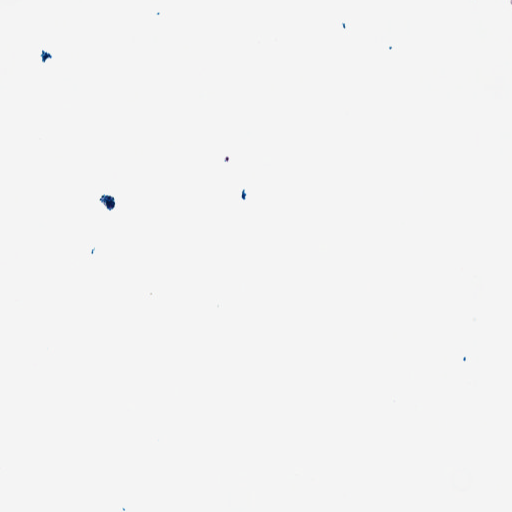

In [20]:
image.read_region((100, 50), 1, (512,512))

In [16]:
image.get_best_level_for_downsample(18)

2

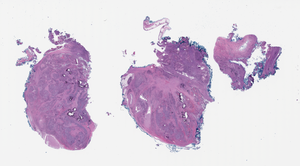

In [17]:
image.get_thumbnail((300,300))